In [1]:
%matplotlib inline

In [16]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
from plotly.offline import iplot, init_notebook_mode
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

,ds,y,deaths
0,2020-01-24,0.0,0
1,2020-01-25,0.0,0
2,2020-01-26,0.0,0
3,2020-01-27,0.0,0
4,2020-01-28,0.0,0


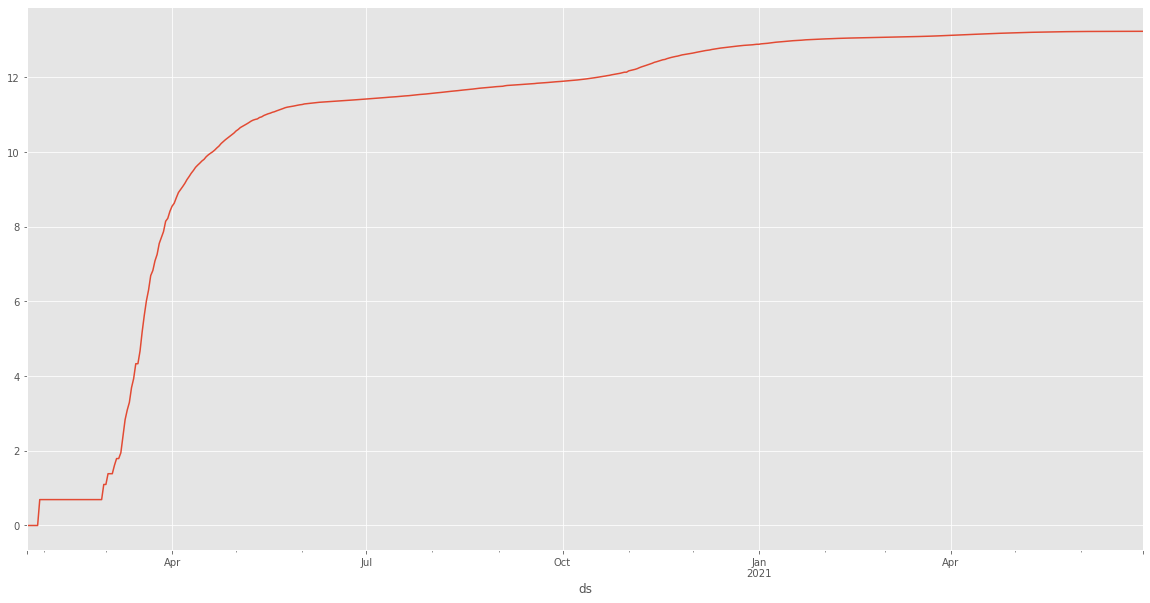

In [17]:
df1 = pd.read_csv('Ckcases.csv', index_col='date', parse_dates=True)
df1 = df1.drop(['county','state','fips','cured'], axis =1)
df1 = df1.reset_index().rename(columns={'date':'ds', 'cases':'y'})
df1['y'] = np.log(df1['y'])
df1.set_index('ds').y.plot()
df1.head()

In [18]:
model = Prophet(yearly_seasonality = False, weekly_seasonality = False, daily_seasonality = True, changepoint_range = .9)
model.fit(df1);
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [19]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
549,2021-07-26,13.283820,12.838744,13.837176
550,2021-07-27,13.284972,12.839256,13.883971
551,2021-07-28,13.286124,12.781375,13.900797
552,2021-07-29,13.287276,12.748019,13.947060
553,2021-07-30,13.288428,12.738080,13.988458


In [20]:
forecast.sort_values('trend', ascending=False)[:10]
print(forecast[['ds', 'trend']].sort_values('trend', ascending=False)[:30])

            ds      trend
553 2021-07-30  13.082327
552 2021-07-29  13.081175
551 2021-07-28  13.080023
550 2021-07-27  13.078871
549 2021-07-26  13.077719
548 2021-07-25  13.076567
547 2021-07-24  13.075415
546 2021-07-23  13.074263
545 2021-07-22  13.073111
544 2021-07-21  13.071959
543 2021-07-20  13.070807
542 2021-07-19  13.069655
541 2021-07-18  13.068503
540 2021-07-17  13.067351
539 2021-07-16  13.066199
538 2021-07-15  13.065047
537 2021-07-14  13.063895
536 2021-07-13  13.062743
535 2021-07-12  13.061591
534 2021-07-11  13.060439
533 2021-07-10  13.059287
532 2021-07-09  13.058135
531 2021-07-08  13.056983
530 2021-07-07  13.055831
529 2021-07-06  13.054678
528 2021-07-05  13.053526
527 2021-07-04  13.052374
526 2021-07-03  13.051222
525 2021-07-02  13.050070
524 2021-07-01  13.048918


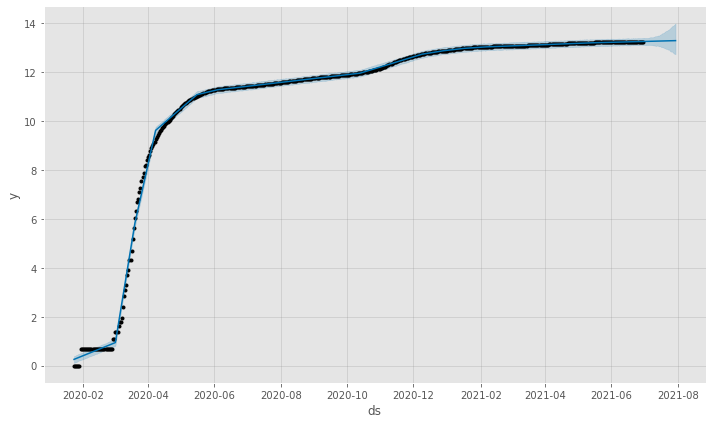

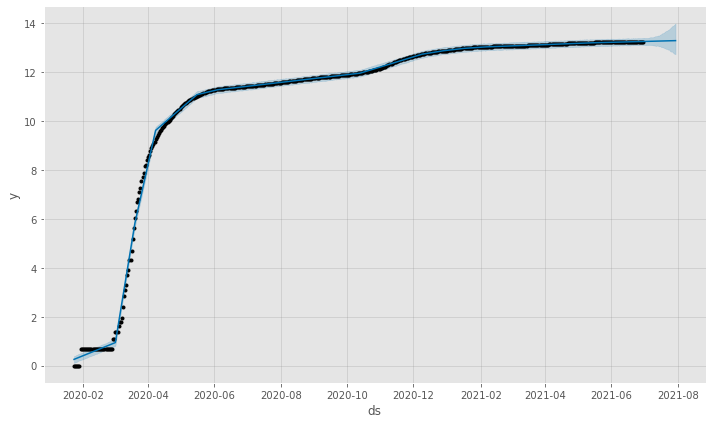

In [21]:
model.plot(forecast)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [24]:
metric_df = forecast.set_index('ds')[['yhat']].join(df1.set_index('ds').y).reset_index()

In [25]:
metric_df.dropna(inplace=True)

In [26]:
r2_score(metric_df.y, metric_df.yhat)

0.9990130832545733

In [27]:
mean_squared_error(metric_df.y, metric_df.yhat)

0.012355270425908756

In [28]:
mean_absolute_error(metric_df.y, metric_df.yhat)

0.04915625504672489

In [29]:
np.sqrt(np.mean((metric_df.y - metric_df.yhat)**2))

0.11115426409233592